In [0]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch

In [0]:
# Import necessary packages

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import helper

import matplotlib.pyplot as plt

In [13]:
!wget -c https://s3.amazonaws.com/content.udacity-data.com/nd089/Cat_Dog_data.zip
!unzip -qq Cat_Dog_data.zip

--2018-12-27 16:33:51--  https://s3.amazonaws.com/content.udacity-data.com/nd089/Cat_Dog_data.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.102.141
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.102.141|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 580495262 (554M) [application/zip]
Saving to: ‘Cat_Dog_data.zip’

Cat_Dog_data.zip    100%[===================>] 553.60M  41.6MB/s    in 14s     

2018-12-27 16:34:06 (40.3 MB/s) - ‘Cat_Dog_data.zip’ saved [580495262/580495262]



In [0]:
### Run this cell

from torchvision import datasets, transforms

data_dir = 'Cat_Dog_data/train'

transform = transforms.Compose([transforms.Resize(225),transforms.CenterCrop(224),transforms.ToTensor()])

dataset = datasets.ImageFolder(data_dir, transform=transform)

dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)


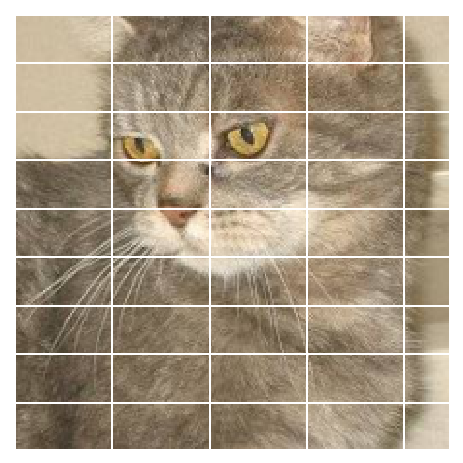

In [17]:
images, labels = next(iter(dataloader))
helper.imshow(images[0], normalize=False)